## Импорт библиотек

In [369]:
import numpy as np
import pandas as pd

InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
import time


# 1) Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

In [370]:
data = pd.read_csv('cwdata/cwurData.csv', sep=",")

Датасет World University Rankings https://www.kaggle.com/mylesoneill/world-university-rankings/data Датасет описывает ранги и баллы мировых ВУЗов за 2012-2015 года в общих и частных категориях.

Колонки:

world_rank(int64) - Мировой ранг ВУЗа в определённый год.
institution(object) -Название ВУЗа
country(object) - Страна ВУЗа
national_rank(int64) - Ранг ВУЗа по стране
quality_of_education(int64) - Ранг по качеству обучения
alumni_employment(int64) - Ранг по трудоустройству выпускников
quality_of_faculty(int64) - Ранг по качеству факультетов
publications(int64) - Ранг по публикациям
influence(int64) - Ранг по влиянию
citations(int64) - Ранг по количеству студентов
broad_impact(float64) - Ранг по широкому влиянию
patents(int64) - Ранг по патентам
score(float64) - Баллы ВУЗа для определения мирового ранга
year(int64y) - Год ранжирования
Целевой признак - мировой ранг.

# 2) Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [371]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [372]:
data.shape

(2200, 14)

In [373]:
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [374]:
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [375]:
data.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [376]:
data["world_rank"].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

# 3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [377]:
data = data.drop(columns=['country','national_rank','score','year','institution'],axis=1)

In [378]:
data1 = data.dropna(axis=0, how='any')

In [379]:
data1.dtypes

world_rank                int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
dtype: object

In [380]:
scale_cols = ['world_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact','patents']

In [381]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data1[scale_cols])

In [382]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data1[new_col_name] = sc1_data[:,i]

In [383]:
data=data1

data.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,world_rank_scaled,quality_of_education_scaled,alumni_employment_scaled,quality_of_faculty_scaled,publications_scaled,influence_scaled,citations_scaled,broad_impact_scaled,patents_scaled
200,1,1,1,1,1,1,1,1.0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001149
201,2,11,2,4,5,3,3,4.0,6,0.001001,0.027322,0.001767,0.013825,0.004004,0.002020,0.002466,0.003003,0.005747
202,3,3,11,2,15,2,2,2.0,1,0.002002,0.005464,0.017668,0.004608,0.014014,0.001010,0.001233,0.001001,0.000000
203,4,2,10,5,10,9,12,13.0,48,0.003003,0.002732,0.015901,0.018433,0.009009,0.008081,0.013564,0.012012,0.054023
204,5,7,12,10,11,12,11,12.0,16,0.004004,0.016393,0.019435,0.041475,0.010010,0.011111,0.012330,0.011011,0.017241


(array([40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.]),
 array([   1.  ,   20.98,   40.96,   60.94,   80.92,  100.9 ,  120.88,
         140.86,  160.84,  180.82,  200.8 ,  220.78,  240.76,  260.74,
         280.72,  300.7 ,  320.68,  340.66,  360.64,  380.62,  400.6 ,
         420.58,  440.56,  460.54,  480.52,  500.5 ,  520.48,  540.46,
         560.44,  580.42,  600.4 ,  620.38,  640.36,  660.34,  680.32,
         700.3 ,  720.28,  740.26,  760.24,  780.22,  800.2 ,  820.18,
         840.16,  860.14,  880.12,  900.1 ,  920.08,  940.06,  960.04,
         980.02, 1000.  ]),
 <a list of 50 Patch objects>)

(array([40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

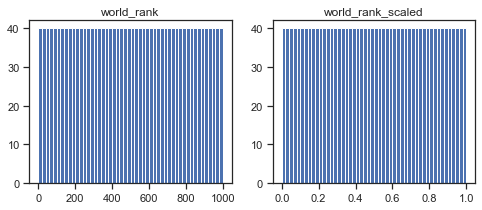

(array([ 16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,
         14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,
         14.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,
         14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,
         14.,  14.,  16.,  14., 655., 641.]),
 array([  1.  ,   8.32,  15.64,  22.96,  30.28,  37.6 ,  44.92,  52.24,
         59.56,  66.88,  74.2 ,  81.52,  88.84,  96.16, 103.48, 110.8 ,
        118.12, 125.44, 132.76, 140.08, 147.4 , 154.72, 162.04, 169.36,
        176.68, 184.  , 191.32, 198.64, 205.96, 213.28, 220.6 , 227.92,
        235.24, 242.56, 249.88, 257.2 , 264.52, 271.84, 279.16, 286.48,
        293.8 , 301.12, 308.44, 315.76, 323.08, 330.4 , 337.72, 345.04,
        352.36, 359.68, 367.  ]),
 <a list of 50 Patch objects>)

(array([ 16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,
         14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,
         14.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,
         14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,  14.,  14.,  16.,
         14.,  14.,  16.,  14., 655., 641.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

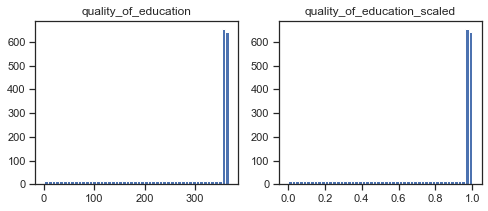

(array([ 24.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,
         22.,  24.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,  22.,  24.,
         22.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,
         22.,  24.,  22.,  22.,  26.,  20.,  22.,  24.,  22., 535.,  12.,
         11.,  11.,  12.,  11.,  11., 445.]),
 array([  1.  ,  12.32,  23.64,  34.96,  46.28,  57.6 ,  68.92,  80.24,
         91.56, 102.88, 114.2 , 125.52, 136.84, 148.16, 159.48, 170.8 ,
        182.12, 193.44, 204.76, 216.08, 227.4 , 238.72, 250.04, 261.36,
        272.68, 284.  , 295.32, 306.64, 317.96, 329.28, 340.6 , 351.92,
        363.24, 374.56, 385.88, 397.2 , 408.52, 419.84, 431.16, 442.48,
        453.8 , 465.12, 476.44, 487.76, 499.08, 510.4 , 521.72, 533.04,
        544.36, 555.68, 567.  ]),
 <a list of 50 Patch objects>)

(array([ 24.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,
         22.,  24.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,  22.,  24.,
         22.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,  22.,  24.,  22.,
         22.,  24.,  22.,  22.,  26.,  20.,  22.,  24.,  22., 535.,  12.,
         11.,  11.,  12.,  11.,  11., 445.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

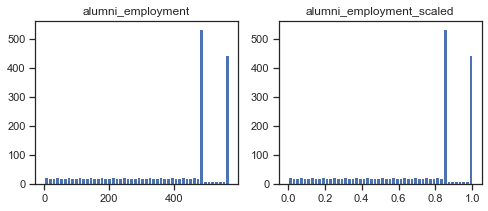

(array([ 10.,   8.,  10.,   8.,   8.,  10.,   8.,   8.,  10.,   8.,   8.,
         10.,   8.,   8.,  10.,   8.,   8.,  10.,   8.,   8.,  10.,   8.,
          8.,  10.,   8.,   8.,  17.,   7.,   7.,  10.,   7.,   4.,  10.,
         10.,   7.,  10.,   7.,  11.,   8.,   7.,   9.,   9.,   8.,   8.,
         11.,   7.,   8.,  10., 795., 787.]),
 array([  1.  ,   5.34,   9.68,  14.02,  18.36,  22.7 ,  27.04,  31.38,
         35.72,  40.06,  44.4 ,  48.74,  53.08,  57.42,  61.76,  66.1 ,
         70.44,  74.78,  79.12,  83.46,  87.8 ,  92.14,  96.48, 100.82,
        105.16, 109.5 , 113.84, 118.18, 122.52, 126.86, 131.2 , 135.54,
        139.88, 144.22, 148.56, 152.9 , 157.24, 161.58, 165.92, 170.26,
        174.6 , 178.94, 183.28, 187.62, 191.96, 196.3 , 200.64, 204.98,
        209.32, 213.66, 218.  ]),
 <a list of 50 Patch objects>)

(array([ 10.,   8.,  10.,   8.,   8.,  10.,   8.,   8.,  10.,   8.,   8.,
         10.,   8.,   8.,  10.,   8.,   8.,  10.,   8.,   8.,  10.,   8.,
          8.,  10.,   8.,   8.,  17.,   7.,   7.,  10.,   7.,   4.,  10.,
         10.,   7.,  10.,   7.,  11.,   8.,   7.,   9.,   9.,   8.,   8.,
         11.,   7.,   8.,  10., 795., 787.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

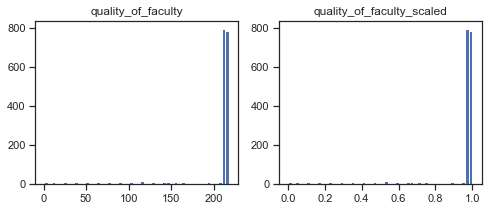

(array([40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 41., 39., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 42., 38., 41., 39., 40., 41., 39., 40., 40., 42., 38.,
        41., 40., 40., 41., 39., 39., 41., 40., 41., 38., 40.]),
 array([   1.  ,   20.98,   40.96,   60.94,   80.92,  100.9 ,  120.88,
         140.86,  160.84,  180.82,  200.8 ,  220.78,  240.76,  260.74,
         280.72,  300.7 ,  320.68,  340.66,  360.64,  380.62,  400.6 ,
         420.58,  440.56,  460.54,  480.52,  500.5 ,  520.48,  540.46,
         560.44,  580.42,  600.4 ,  620.38,  640.36,  660.34,  680.32,
         700.3 ,  720.28,  740.26,  760.24,  780.22,  800.2 ,  820.18,
         840.16,  860.14,  880.12,  900.1 ,  920.08,  940.06,  960.04,
         980.02, 1000.  ]),
 <a list of 50 Patch objects>)

(array([40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 41., 39., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
        40., 40., 42., 38., 41., 39., 40., 41., 39., 40., 40., 42., 38.,
        41., 40., 40., 41., 39., 39., 41., 40., 41., 38., 40.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

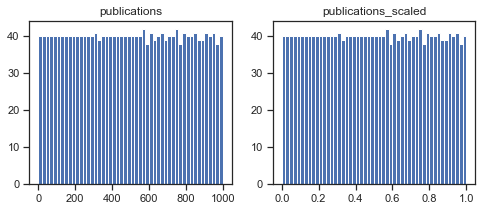

(array([40., 40., 40., 40., 38., 40., 40., 40., 40., 38., 40., 40., 40.,
        40., 38., 40., 40., 40., 40., 38., 40., 40., 40., 40., 38., 40.,
        40., 40., 40., 38., 40., 40., 40., 40., 38., 40., 40., 40., 40.,
        38., 41., 39., 40., 41., 37., 42., 39., 44., 37., 56.]),
 array([  1. ,  20.8,  40.6,  60.4,  80.2, 100. , 119.8, 139.6, 159.4,
        179.2, 199. , 218.8, 238.6, 258.4, 278.2, 298. , 317.8, 337.6,
        357.4, 377.2, 397. , 416.8, 436.6, 456.4, 476.2, 496. , 515.8,
        535.6, 555.4, 575.2, 595. , 614.8, 634.6, 654.4, 674.2, 694. ,
        713.8, 733.6, 753.4, 773.2, 793. , 812.8, 832.6, 852.4, 872.2,
        892. , 911.8, 931.6, 951.4, 971.2, 991. ]),
 <a list of 50 Patch objects>)

(array([40., 40., 40., 40., 38., 40., 40., 40., 40., 38., 40., 40., 40.,
        40., 38., 40., 40., 40., 40., 38., 40., 40., 40., 40., 38., 40.,
        40., 40., 40., 38., 40., 40., 40., 40., 38., 40., 40., 40., 40.,
        38., 41., 39., 40., 41., 37., 42., 39., 44., 37., 56.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

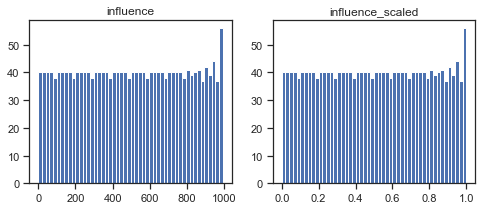

(array([ 35.,  32.,  35.,  33.,  38.,  25.,  40.,  30.,  41.,  47.,  11.,
         28.,  35.,  52.,  30.,  33.,  23.,  61.,   0., 100.,   0.,   0.,
        103.,   0.,  87.,   0.,  83.,   0.,   0.,   0., 116., 134.,   0.,
          0.,   0.,   0.,   0., 191.,   0., 167.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 390.]),
 array([  1.  ,  17.22,  33.44,  49.66,  65.88,  82.1 ,  98.32, 114.54,
        130.76, 146.98, 163.2 , 179.42, 195.64, 211.86, 228.08, 244.3 ,
        260.52, 276.74, 292.96, 309.18, 325.4 , 341.62, 357.84, 374.06,
        390.28, 406.5 , 422.72, 438.94, 455.16, 471.38, 487.6 , 503.82,
        520.04, 536.26, 552.48, 568.7 , 584.92, 601.14, 617.36, 633.58,
        649.8 , 666.02, 682.24, 698.46, 714.68, 730.9 , 747.12, 763.34,
        779.56, 795.78, 812.  ]),
 <a list of 50 Patch objects>)

(array([ 35.,  32.,  35.,  33.,  38.,  25.,  40.,  30.,  41.,  47.,  11.,
         28.,  35.,  52.,  30.,  33.,  23.,  61.,   0., 100.,   0.,   0.,
        103.,   0.,  87.,   0.,  83.,   0.,   0.,   0., 116., 134.,   0.,
          0.,   0.,   0.,   0., 191.,   0., 167.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 390.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

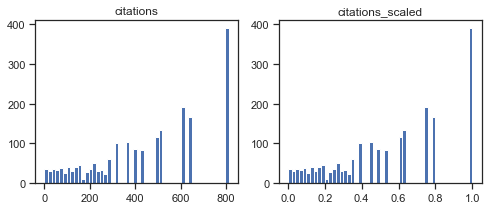

(array([40., 40., 42., 40., 39., 40., 41., 38., 46., 37., 44., 38., 36.,
        39., 52., 32., 36., 40., 45., 37., 50., 35., 54., 25., 39., 45.,
        40., 42., 41., 36., 39., 38., 46., 42., 42., 38., 34., 49., 25.,
        64., 30., 35., 43., 39., 40., 29., 50., 41., 31., 36.]),
 array([   1.  ,   20.98,   40.96,   60.94,   80.92,  100.9 ,  120.88,
         140.86,  160.84,  180.82,  200.8 ,  220.78,  240.76,  260.74,
         280.72,  300.7 ,  320.68,  340.66,  360.64,  380.62,  400.6 ,
         420.58,  440.56,  460.54,  480.52,  500.5 ,  520.48,  540.46,
         560.44,  580.42,  600.4 ,  620.38,  640.36,  660.34,  680.32,
         700.3 ,  720.28,  740.26,  760.24,  780.22,  800.2 ,  820.18,
         840.16,  860.14,  880.12,  900.1 ,  920.08,  940.06,  960.04,
         980.02, 1000.  ]),
 <a list of 50 Patch objects>)

(array([40., 40., 42., 40., 39., 40., 41., 38., 46., 37., 44., 38., 36.,
        39., 52., 32., 36., 40., 45., 37., 50., 35., 54., 25., 39., 45.,
        40., 42., 41., 36., 39., 38., 46., 42., 42., 38., 34., 49., 25.,
        64., 30., 35., 43., 39., 40., 29., 50., 41., 31., 36.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

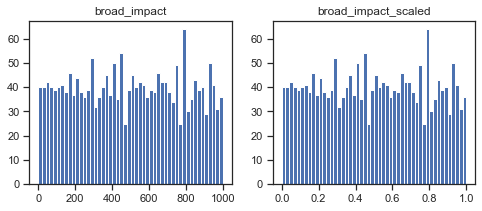

(array([ 36.,  36.,  34.,  37.,  32.,  38.,  36.,  39.,  27.,  39.,  31.,
         50.,  50.,  17.,  38.,  18.,  44.,  49.,  17.,  52.,  18.,  70.,
         18.,  17.,  72.,  18.,  17.,  89.,  17.,  17.,  18., 102.,  18.,
         17.,  17.,  18., 117.,  20.,  15.,  17.,  18.,  20., 281.,  16.,
         19.,  16.,  20.,  16.,  22., 140.]),
 array([  1. ,  18.4,  35.8,  53.2,  70.6,  88. , 105.4, 122.8, 140.2,
        157.6, 175. , 192.4, 209.8, 227.2, 244.6, 262. , 279.4, 296.8,
        314.2, 331.6, 349. , 366.4, 383.8, 401.2, 418.6, 436. , 453.4,
        470.8, 488.2, 505.6, 523. , 540.4, 557.8, 575.2, 592.6, 610. ,
        627.4, 644.8, 662.2, 679.6, 697. , 714.4, 731.8, 749.2, 766.6,
        784. , 801.4, 818.8, 836.2, 853.6, 871. ]),
 <a list of 50 Patch objects>)

(array([ 36.,  36.,  34.,  37.,  32.,  38.,  36.,  39.,  27.,  39.,  31.,
         50.,  50.,  17.,  38.,  18.,  44.,  49.,  17.,  53.,  17.,  70.,
         18.,  17.,  73.,  17.,  17.,  89.,  17.,  17.,  18., 102.,  18.,
         17.,  17.,  18., 117.,  20.,  15.,  17.,  18.,  20., 281.,  16.,
         19.,  16.,  20.,  16.,  22., 140.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

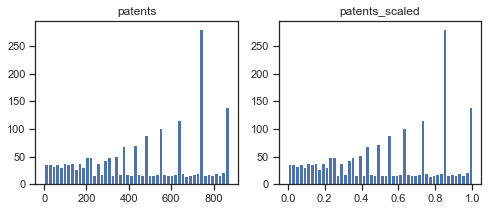

In [384]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [385]:
data = data.drop(columns=['world_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact','patents'],axis=1)

In [386]:
data.shape

(2000, 9)

# 4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [387]:
data.corr()

,world_rank_scaled,quality_of_education_scaled,alumni_employment_scaled,quality_of_faculty_scaled,publications_scaled,influence_scaled,citations_scaled,broad_impact_scaled,patents_scaled
world_rank_scaled,1.000000,0.587646,0.586003,0.571581,0.906535,0.873363,0.824753,0.942998,0.631457
quality_of_education_scaled,0.587646,1.000000,0.471441,0.691573,0.522428,0.549674,0.526463,0.521615,0.391934
alumni_employment_scaled,0.586003,0.471441,1.000000,0.392224,0.466084,0.409959,0.446784,0.423619,0.408691
quality_of_faculty_scaled,0.571581,0.691573,0.392224,1.000000,0.534627,0.564924,0.554913,0.549345,0.419068
publications_scaled,0.906535,0.522428,0.466084,0.534627,1.000000,0.847979,0.792149,0.917878,0.599615
influence_scaled,0.873363,0.549674,0.409959,0.564924,0.847979,1.000000,0.810993,0.916040,0.526975
citations_scaled,0.824753,0.526463,0.446784,0.554913,0.792149,0.810993,1.000000,0.852638,0.508626
broad_impact_scaled,0.942998,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861
patents_scaled,0.631457,0.391934,0.408691,0.419068,0.599615,0.526975,0.508626,0.562861,1.000000


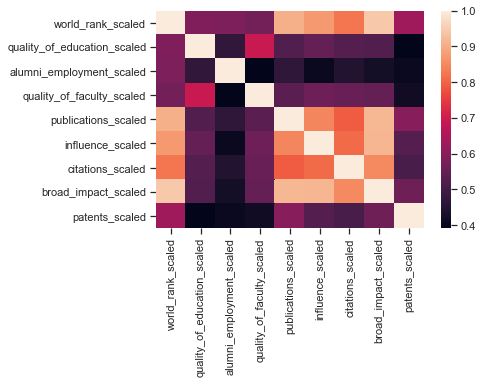

In [388]:
sns.heatmap(data.corr())

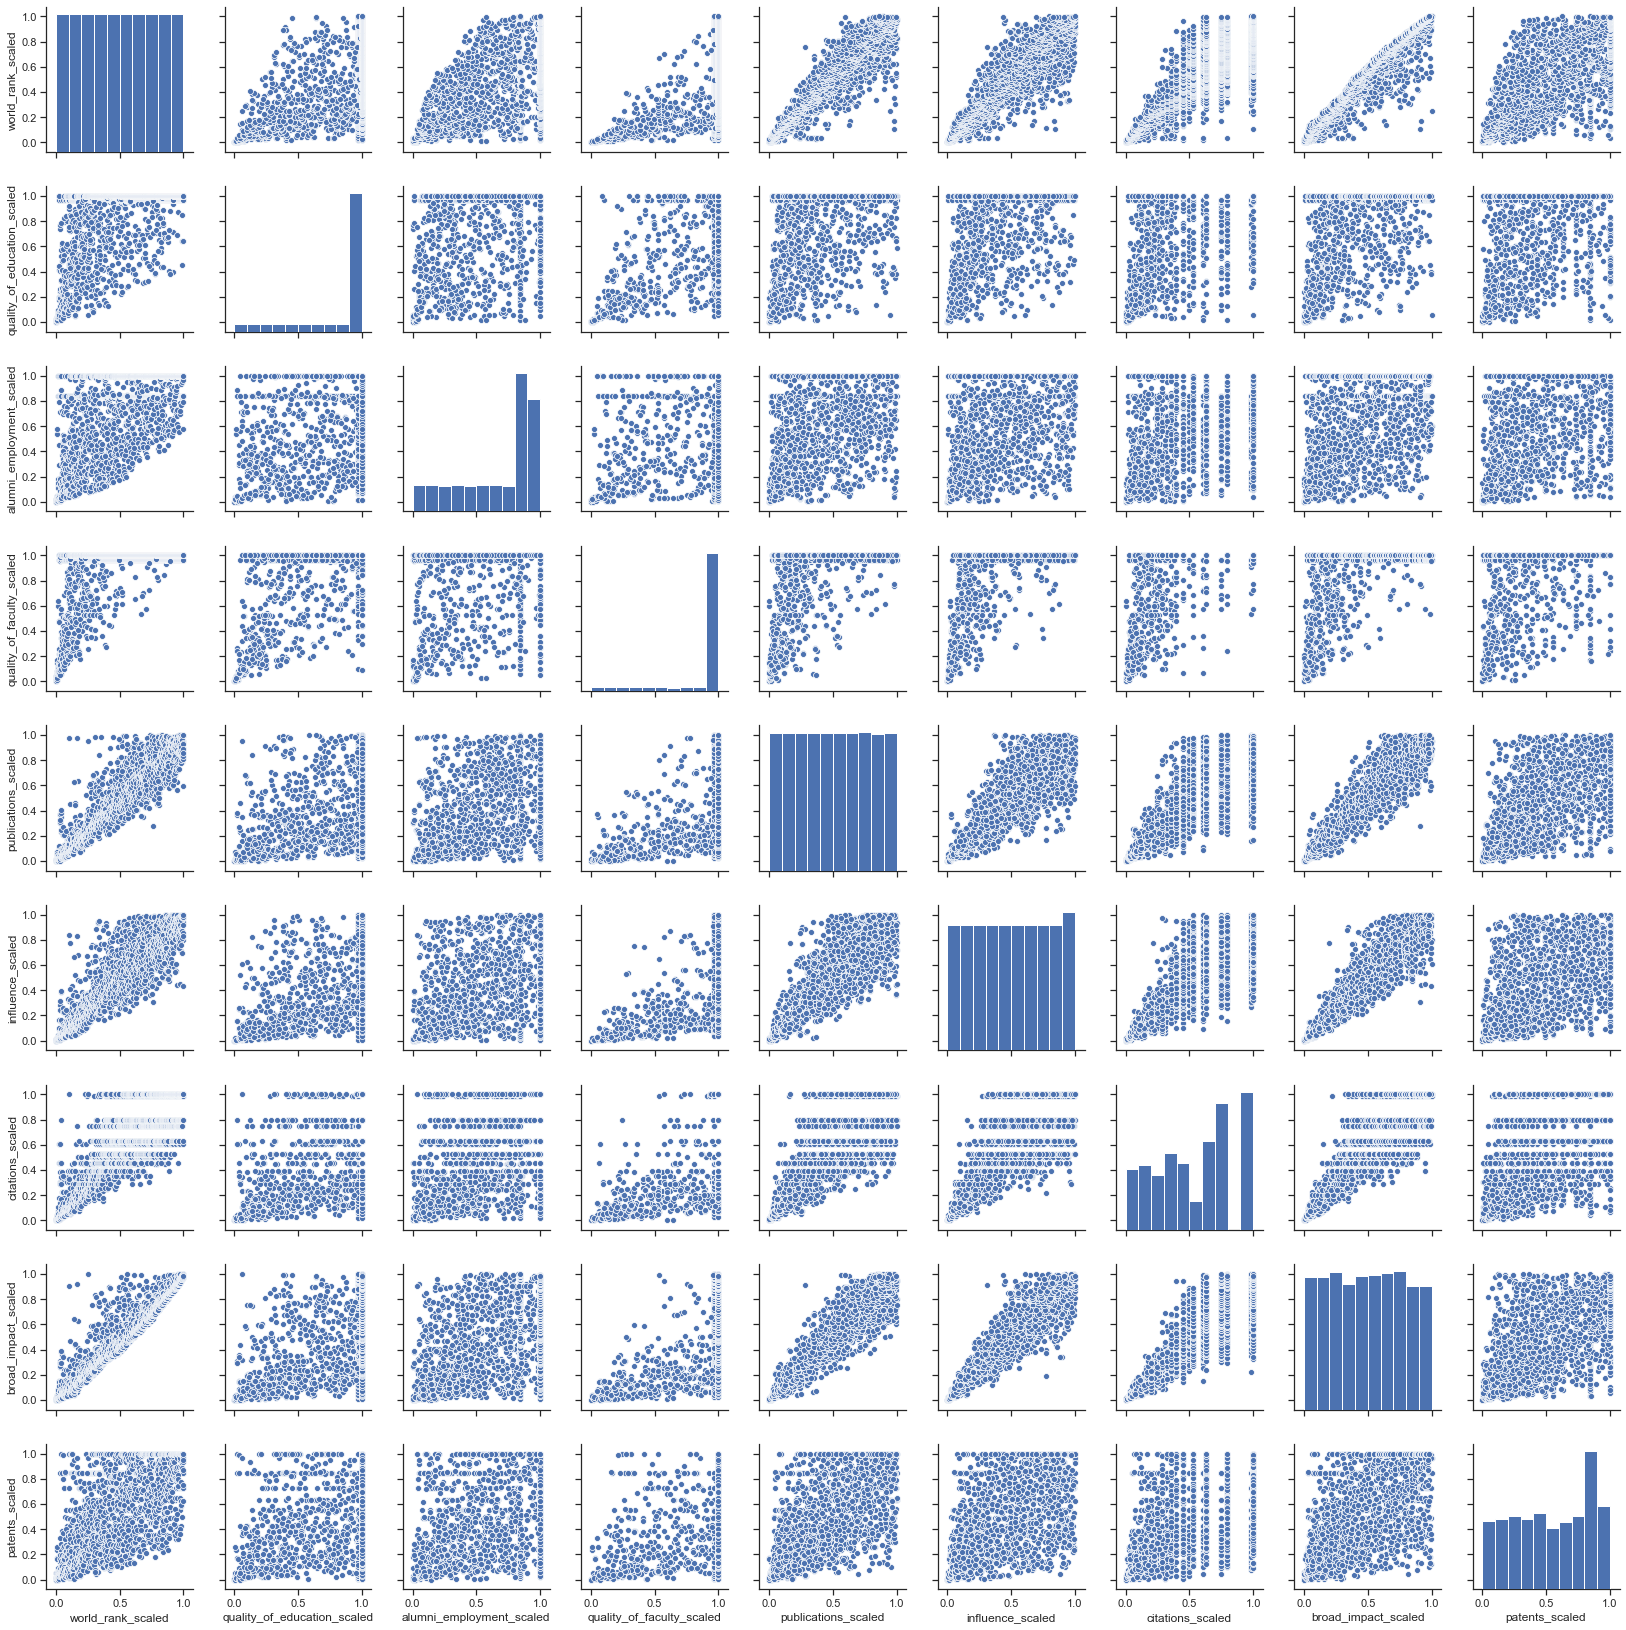

In [389]:
sns.pairplot(data)

# 5) Выбор метрик для последующей оценки качества моделей.
Mean absolute error - средняя абсолютная ошибка,
Mean squared error - средняя квадратичная ошибка,
Median absolute error - абсолютная ошибка по медиане.

In [390]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [391]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()  

# 6) Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.
Задача с предугадыванием ранга вуза требует решение задачи регрессии, поэтому будем выбирать методы регрессии.
Методы:
Lasso,
Elastic-Net,
Ridge,
Support Vector Regression,
KNeighborsRegressor

In [392]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

# 7) Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [393]:
features = data.drop(['world_rank_scaled'], axis=1)
target_tmp = data['world_rank_scaled']
target = pd.DataFrame({'world_rank_scaled':target_tmp.index, 'world_rank_scaled':target_tmp.values})
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=1)
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(1400, 8)

(600, 8)

(1400, 1)

(600, 1)

# 8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [394]:
regrMetricLogger = MetricLogger()

In [395]:
regr_models = {'Lasso': linear_model.Lasso(alpha=0.1),
               'Enet': linear_model.ElasticNetCV(),
               'Ridge':linear_model.Ridge(alpha=0.5),
               'SVR':SVR()}

 'SGDR': linear_model.SGDRegressor()

In [396]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    mdae = median_absolute_error(Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('MDAE', model_name, mdae)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MSE={}, MDAE={}'.format(
        round(mae, 3), round(mse, 3), round(mdae, 3)))
    print('*****************************************************')

In [397]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

MAE=0.253, MSE=0.084, MDAE=0.242
*****************************************************
*****************************************************
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

MAE=0.046, MSE=0.004, MDAE=0.038
*****************************************************
*****************************************************
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

MAE=0.046, MSE=0.004, MDAE=0.038
**********

# 9) Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [398]:
n_range = np.array(range(1,1100,100))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001])}]

In [399]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, Y_train)

Wall time: 1.29 s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [400]:
regr_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [401]:
regr_gs.best_params_

{'n_neighbors': 1}

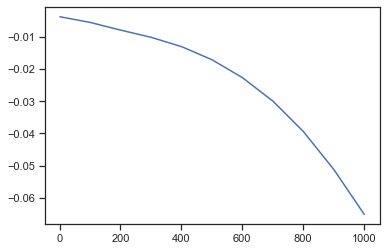

In [402]:
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

# 10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [403]:
regr_models_grid = {'KNN_001':regr_gs.best_estimator_}

In [404]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)


*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

MAE=0.038, MSE=0.003, MDAE=0.028
*****************************************************


# 11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [405]:
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'MDAE'], dtype=object)

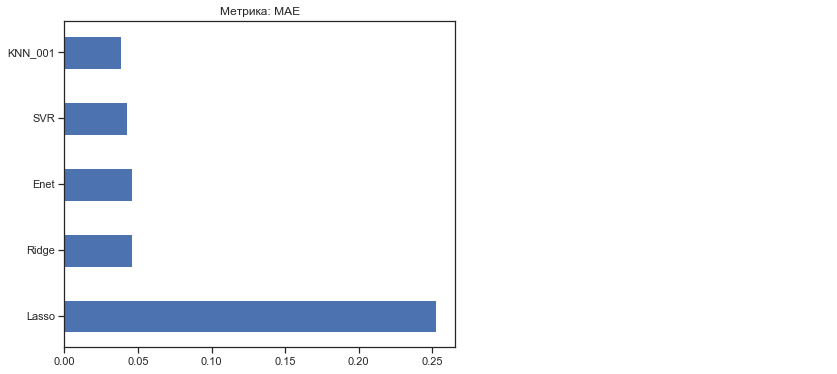

In [406]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

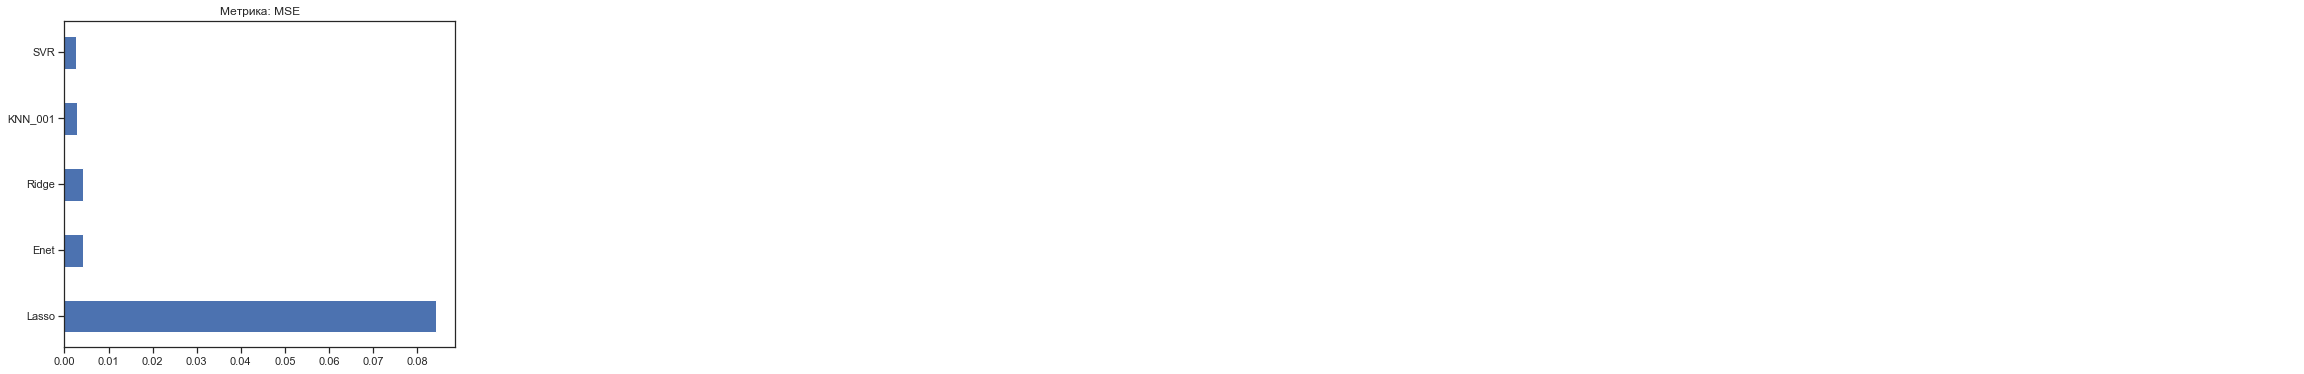

In [407]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

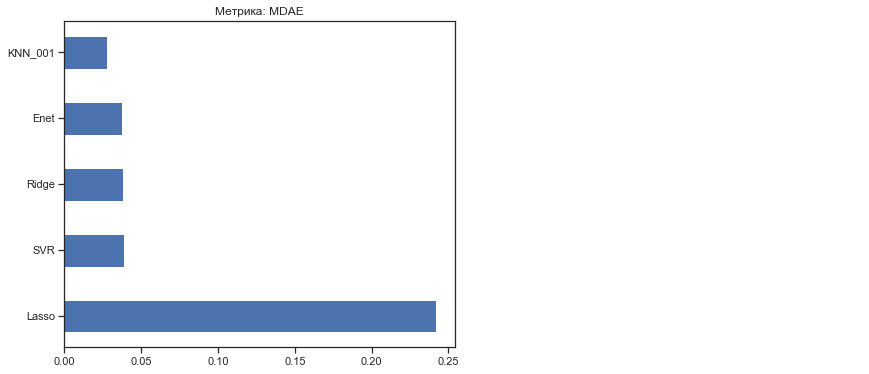

In [408]:
regrMetricLogger.plot('Метрика: ' + 'MDAE', 'MDAE', ascending=False, figsize=(7, 6))

## Вывод: лучшей оказалась модель на основе метода опорных векторов, модели гребневого метода, ближайших соседов и модель метода эластичной сети показали средние результаты, худшей оказалась модель на основе метода лассо